<a href="https://colab.research.google.com/github/yewon-hong-ewha/esaa_9/blob/main/YB_4%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

더 해보고 싶다 싶으면 복사본으로 가져가서 테스트 해보고 완성된 것만 코드 여기에 옮겨주기!!!!!!

---

데이터 이름 통일:
* Train 데이터: train
  * X_train
  * y_train
* Test 데이터: test

목차
1. EDA
2. 데이터 전처리
3. 앙상블
4. Random Forest
5. GBM
6. LightGBM
7. XGBoost

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#경고 메세지 숨김
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:

#데이터 불러오기
train= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/train.csv', sep=',')
test= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/test.csv', sep=',')
submission= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/sample_submission.csv', sep=',')

In [ ]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


train 중 quality 변수가 사라진것을 확인 할 수 있음

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


null값존재 안함

# 1. EDA

<Axes: >

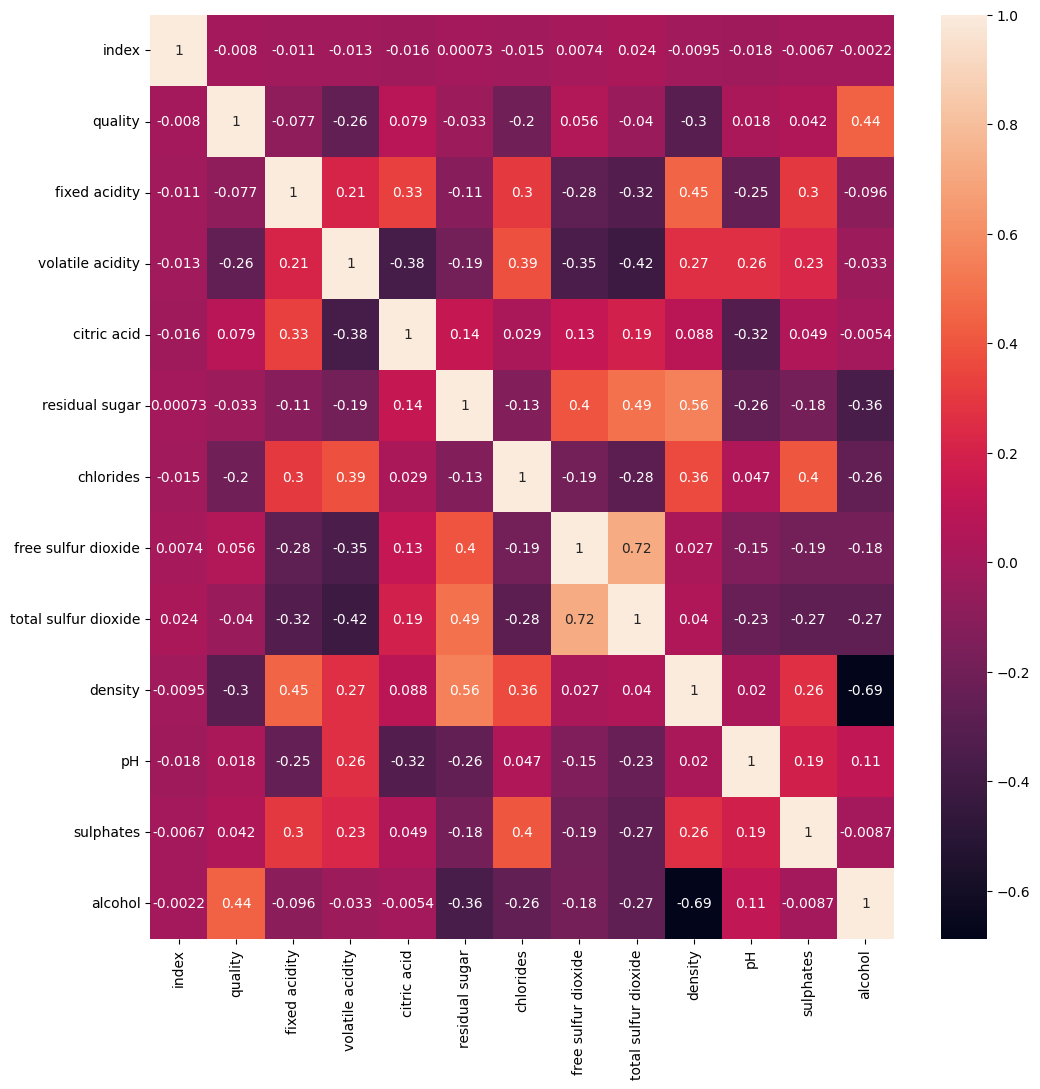

In [ ]:
# train 변수 간 상관관계 보기
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(),annot=True)

# 2. 데이터 전처리

type에는 white와 red 두 종류 존재: 각각 0,1로 변환

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

enc=LabelEncoder()
enc.fit(train['type'])
train['type']=enc.transform(train['type'])
test['type']=enc.transform(test['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [ ]:
#변수 제거
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

# 피처,타겟 변수 분리
X_train = train.drop(['quality'], axis = 1) #feature
y_train = train['quality'] #target

정규화

In [ ]:
# numerical_col
numerical_col = X_train.select_dtypes(exclude='object').columns.tolist()
numerical_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [ ]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[numerical_col] = ss.fit_transform(X_train[numerical_col])
test[numerical_col] = ss.fit_transform(test[numerical_col])

# 3. 앙상블

## 보팅 앙상블

### 최적의 n_neighbors 찾기

"Choice of k is very critical – A small value of k means that noise will have a higher influence on the result. A large value make it computationally expensive and kinda defeats the basic philosophy behind KNN (that points that are near might have similar densities or classes ) .A simple approach to select k is set k = n^(1/2)."
https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/


1 부터 70 까지 n_neighbors 후보로 돌려보기\
$\sqrt{n} = \sqrt{5497} ≈ 74$


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

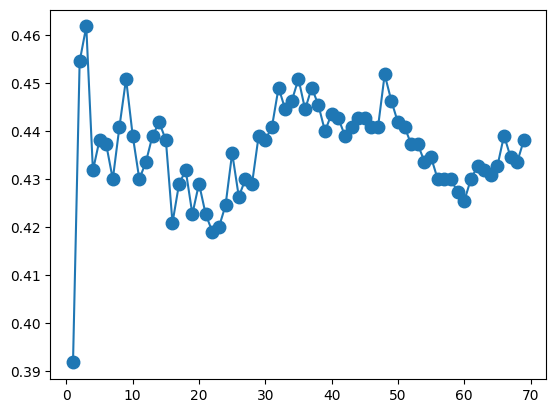

In [ ]:
split_X_train, split_X_test, split_y_train, split_y_test=train_test_split(X_train, y_train, test_size=0.2, random_state=0)

error_rate = []

for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(split_X_train, split_y_train)
    pred = knn.predict(split_X_test)
    error_rate.append(np.mean(pred != split_y_test))

plt.plot(range(1,70),error_rate, marker='o', markersize=9)

Try n_neighbors=20

Train 데이터로 train test split을 하여 accuracy를 계산하여, 모델을 정하기에 앞서 이 데이터를 모델링하는데에 이 classifier들이 적합한지 성능을 평가해보자.

In [ ]:
# 개별 모델들: 로지스틱 회귀, KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 20)

# 소프트&하드 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf_soft = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")
vo_clf_hard = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)], voting = "hard")

# VotingClassifier 학습/예측/평가.
vo_clf_soft.fit(split_X_train, split_y_train)
vo_clf_hard.fit(split_X_train, split_y_train)
pred_soft = vo_clf_soft.predict(split_X_test)
pred_hard = vo_clf_hard.predict(split_X_test)

print("Soft Voting 분류기 정확도: {0:.4f}".format(accuracy_score(split_y_test, pred_soft)))
print("Hard Voting 분류기 정확도: {0:.4f}\n".format(accuracy_score(split_y_test, pred_hard)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(split_X_train, split_y_train)
  pred = classifier.predict(split_X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(split_y_test, pred)))

Soft Voting 분류기 정확도: 0.5891
Hard Voting 분류기 정확도: 0.5764

LogisticRegression 정확도 : 0.5636
KNeighborsClassifier 정확도 : 0.5709


Train data로 학습/예측/평가해보았을때 점수가 좋지 않아 보팅 앙상블을 이용하지 않기로 하겠다

## 스태킹 앙상블

개별 모델은 KNN, random forest, decision tree, adaboost

최종 모델은 logistic regression

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 스태킹에 사용될 ML 알고리즘 클래스 생성
knn_clf=KNeighborsClassifier(n_neighbors=20)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)

#lr_final=LogisticRegression(C=10)

In [ ]:
# 개별 모델들을 학습
knn_clf.fit(split_X_train, split_y_train)
rf_clf.fit(split_X_train, split_y_train)
dt_clf.fit(split_X_train, split_y_train)
ada_clf.fit(split_X_train, split_y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred=knn_clf.predict(split_X_test)
rf_pred=rf_clf.predict(split_X_test)
dt_pred=dt_clf.predict(split_X_test)
ada_pred=ada_clf.predict(split_X_test)



print('KNN 정확도:{0:.4f}'.format(accuracy_score(split_y_test, knn_pred)))
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy_score(split_y_test, rf_pred)))
print('결정 트리 정확도:{0:.4f}'.format(accuracy_score(split_y_test, dt_pred)))
print('에이다부스트 정확도:{0:.4f}'.format(accuracy_score(split_y_test, ada_pred)))

KNN 정확도:0.5709
랜덤 포레스트 정확도:0.6891
결정 트리 정확도:0.5809
에이다부스트 정확도:0.3573


각 알고리즘의 예측 결과를 피처로 만들기

In [ ]:
pred=np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)
pred=np.transpose(pred)
print(pred.shape)

(4, 1100)
(1100, 4)


최종 메타 모델 (log reg) 학습하고 예측 정확도 측정

### 최적의 Logistic regresssion C 값 찾기
"C must be a positive float. Like in support vector machines, smaller values specify stronger regularization."\
strong regularization: "your model will be simple, but you run the risk of underfitting your data.

In [ ]:
acc = []
for i in range(1,30):
  lr_final=LogisticRegression(C=i)
  lr_final.fit(pred, split_y_test)
  finalpred = lr_final.predict(pred)
  acc.append(np.round(accuracy_score(split_y_test, finalpred),4))

i = list(range(1,30))
temp =pd.DataFrame(list(zip(i, acc)), columns = ['i', 'acc'])
temp = temp.sort_values(by=['acc'], ascending=False)
temp

,i,acc
9,10,0.6936
13,14,0.6845
3,4,0.6836
18,19,0.6836
28,29,0.6827
24,25,0.6827
20,21,0.6827
19,20,0.6827
11,12,0.6827
16,17,0.6818


C = 27, 6 일 때 정확도 높음 (0.6827)

보팅보다는 스태킹 앙상블이 정확도가 낫다.\
Random Forest의 정확도가 가장 좋다.\
StackingClassifier를 이용해 풀 train 데이터로 학습/예측시켜 제출해보겠다.

### Using StackingClassifier
[참고자료](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

C = 27

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# define the base models
# KNN, random forest, decision tree, adaboost
level0 = list()
level0.append(('knn', KNeighborsClassifier(n_neighbors=20)))
level0.append(('rf', RandomForestClassifier(n_estimators=100, random_state=0)))
level0.append(('dt', DecisionTreeClassifier()))
level0.append(('ada', AdaBoostClassifier(n_estimators=100)))
# define meta learner model
level1 = LogisticRegression(C=27)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction
yhat = model.predict(test)

In [ ]:
submission['quality'] = yhat

In [ ]:
submission.to_csv('stackingnew.csv', index=False)

when C=27, 데이콘 점수: 0.679

C = 6

In [ ]:
level1 = LogisticRegression(C=6)
# define the stacking ensemble
model2 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model2.fit(X_train, y_train)
# make a prediction
yhat2 = model.predict(test)

In [ ]:
submission['quality'] = yhat2

In [ ]:
submission.to_csv('stackingnew2.csv', index=False)

when C=6, 데이콘 점수: 0.681

# 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(split_X_train, split_y_train)
pred_test = rf_clf.predict(split_X_test)

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 400],
    'max_depth':[None, 5],
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split':[2, 4]
    }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
최고 평균 정확도 수치 : 0.6316


#### rf_clf1 : 최적의 하이퍼 파라미터를 넣은 모델

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(test)

#### feature_importance_ 속성으로 피처 중요도 시각화

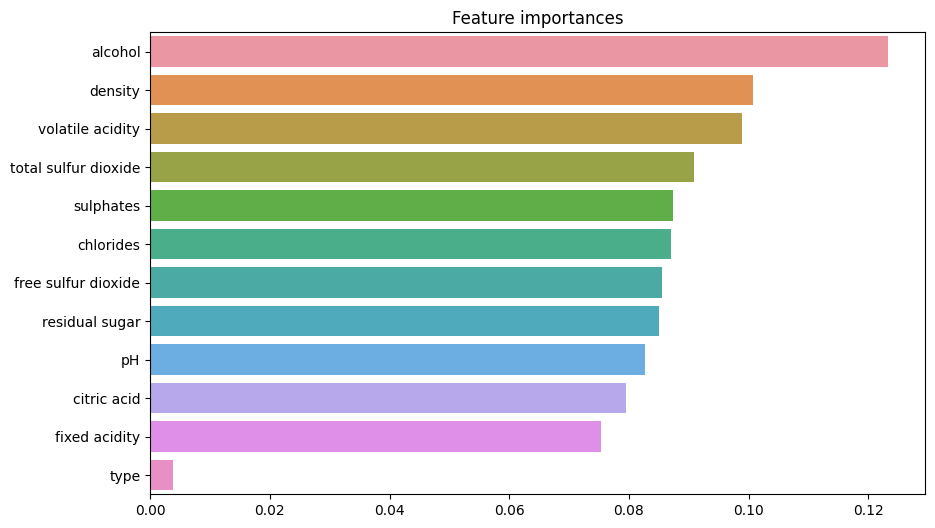

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature importance 추출 및 정렬
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_sorted = ftr_importances.sort_values(ascending=False)

# feature importance를 column별로 시각화하기
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_sorted, y = ftr_sorted.index)
plt.show()

# 5. GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(split_X_train, split_y_train)
gb_pred = gb_clf.predict(split_X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 400],
    'learning_rate': [0.05]
    }

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=3, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
최적 하이퍼 파라미터 :
 {'learning_rate': 0.05, 'n_estimators': 400}
최고 평균 정확도 수치 : 0.5920


In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(test)

#### feature_importance_ 속성으로 피처 중요도 시각화

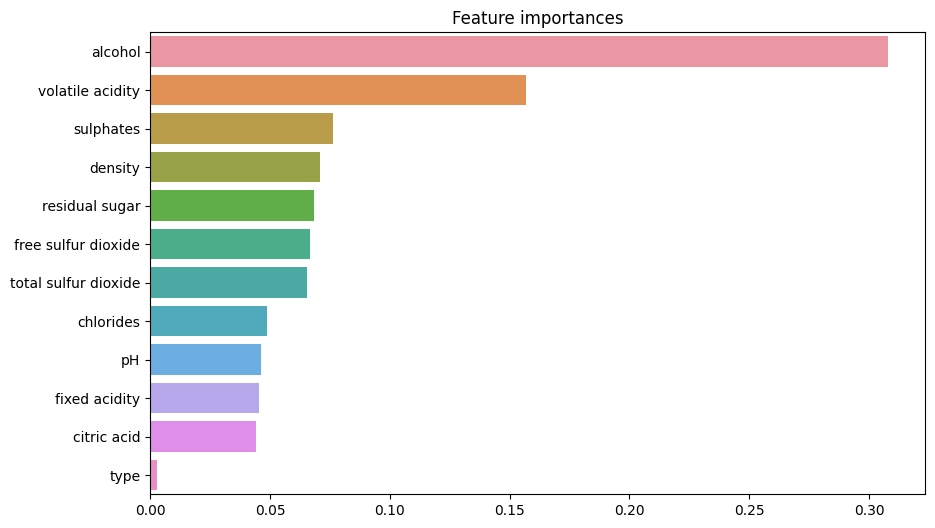

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature importance 추출 및 정렬
ftr_importances_values_gb = gb_clf.feature_importances_
ftr_importances_gb = pd.Series(ftr_importances_values_gb, index=X_train.columns)
ftr_sorted_gb = ftr_importances_gb.sort_values(ascending=False)

# feature importance를 column별로 시각화하기
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_sorted_gb, y = ftr_sorted_gb.index)
plt.show()

# 6. LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=200)
lgbm_wrapper.fit(X_train, y_train, eval_metric="logloss")
preds = lgbm_wrapper.predict(test)
pred_proba = lgbm_wrapper.predict_proba(test)[:,1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 5497, number of used features: 12
[LightGBM] [Info] Start training from score -5.353861
[LightGBM] [Info] Start training from score -3.386211
[LightGBM] [Info] Start training from score -1.123105
[LightGBM] [Info] Start training from score -0.822089
[LightGBM] [Info] Start training from score -1.783246
[LightGBM] [Info] Start training from score -3.588077
[LightGBM] [Info] Start training from score -7.002520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

단순 lightgbm에서 n_estimators를 200으로 설정했을 때 데이콘 결과가 0.701로 높게 나왔다.

In [ ]:
train= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/train.csv', sep=',')
test= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/test.csv', sep=',')
enc=LabelEncoder()
enc.fit(train['type'])
train['type']=enc.transform(train['type'])
test['type']=enc.transform(test['type'])
train.head()
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

In [ ]:
train_x = train.drop(['quality'], axis = 1)
train_y = train['quality']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, shuffle = True, test_size = 0.2, random_state=156)

In [ ]:
# lightgbm의 파라미터들을 달리하여 테스트
lgbm_clf = LGBMClassifier(objective='multiclass', metric='multi_logloss')

params = {'n_estimators': [100,200,300],
          'learning_rate': [0.01, 0.05, 0.1],
          'reg_alpha': [0.88, 0.9, 0.92]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, error_score='raise')
gridcv.fit(X_train, y_train,  eval_metric='logloss', eval_set=[(X_train, y_train), (X_test, y_test)])
print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(gridcv.best_score_))
print("GridSearchCV 최적 파라미터:", gridcv.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1484
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.391465
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.821849
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further 

In [ ]:
lgbmgrid = LGBMClassifier(objective='multiclass', metric='multi_logloss', n_estimators=300, reg_alpha=0.92, learning_rate=0.05)

In [ ]:
predsgrid=gridcv.predict(test)

파라미터를 변경하였을 때 데이콘 결과는 0.661이 나왔다. 앞의 기본 lightgbm 모델보다 결과가 좋아지지 못했다.

앞에서 최적의 파라미터 중 n_estimators=300이 나와 기본 lightgbm의 n_estimators를 300으로 변경시켜 모델을 학습시켰다.

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=300)
lgbm_wrapper.fit(X_train, y_train, eval_metric="logloss")
preds = lgbm_wrapper.predict(test)
pred_proba = lgbm_wrapper.predict_proba(test)[:,1]

데이콘에서의 정확도는 0.694로 앞의 best parameters 를 이용한 모델보다는 좋은 정확도를 보였지만 첫 번째의 n_estimators=200일 때의 성능보다는 좋지 못함을 확인할 수 있다.

# 7. XGBoost

In [ ]:
train= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/train.csv', sep=',')
test= pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/data/wine/test.csv', sep=',')
enc=LabelEncoder()
enc.fit(train['type'])
train['type']=enc.transform(train['type'])
test['type']=enc.transform(test['type'])
train.head()
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

# 피처,타겟 변수 분리
X_train = train.drop(['quality'], axis = 1) #feature
y_train = train['quality'] #target

In [ ]:
#데이터 분리
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
train_y= le.fit_transform(train_y)

train_x1,test_x1, train_y1, test_y1 = train_test_split(X_train,train_y,test_size=0.3, random_state=156)
print(train_x1.shape, train_y1.shape,test_x1.shape,test_y1.shape)

(3847, 12) (3847,) (1650, 12) (1650,)


In [ ]:
#matrix로 변환
dtrain= xgb.DMatrix(data=train_x1,label= train_y1)
dtest=xgb.DMatrix(data=test_x1,label=test_y1)

In [ ]:
#주어진 자체 최적화 api 참고용으로 기재
from sklearn.model_selection import GridSearchCV

params={'max_depth':7,'min_child_weight':3,'colsample_bytree':0.75}
xgb.cv(params,dtrain,num_boost_round=10,nfold=3,stratified=False,folds=None, metrics=(),obj=None,feval=None,maximize=False,early_stopping_rounds=None,fpreproc=None,as_pandas=True,verbose_eval=None,show_stdv=True,seed=0,callbacks=None,shuffle=True)

#1. xgb_Wrapper 사용

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_wrapper= XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=7)
params={'max_depth':[3,5,7],'min_child_weight':[1,3],'colsample_bytree':[0.5,0.75]}
gridcv=GridSearchCV(xgb_wrapper,param_grid=params,cv=5)
gridcv.fit(train_x1,train_y1)
print('GridSearchCV 최적 파라미터',gridcv.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV 최적 파라미터 {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}


In [ ]:
# GridSearchCV 최적 파라미터 {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}
params={'max_depth':7,'min_child_weight':1,'colsample_bytree':0.75}
evals=[(test_x1, test_y1)]
xgb_wrapper.fit(train_x1,train_y1,early_stopping_rounds=100,eval_metric='mlogloss',eval_set=evals,verbose=True,)
w_preds=xgb_wrapper.predict(X_test)

[0]	validation_0-mlogloss:1.82768
[1]	validation_0-mlogloss:1.73139
[2]	validation_0-mlogloss:1.64929
[3]	validation_0-mlogloss:1.57798
[4]	validation_0-mlogloss:1.51819
[5]	validation_0-mlogloss:1.46516
[6]	validation_0-mlogloss:1.41769


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-mlogloss:1.37520
[8]	validation_0-mlogloss:1.33688
[9]	validation_0-mlogloss:1.30327
[10]	validation_0-mlogloss:1.27147
[11]	validation_0-mlogloss:1.24307
[12]	validation_0-mlogloss:1.21732
[13]	validation_0-mlogloss:1.19437
[14]	validation_0-mlogloss:1.17388
[15]	validation_0-mlogloss:1.15474
[16]	validation_0-mlogloss:1.13702
[17]	validation_0-mlogloss:1.12028
[18]	validation_0-mlogloss:1.10668
[19]	validation_0-mlogloss:1.09265
[20]	validation_0-mlogloss:1.08022
[21]	validation_0-mlogloss:1.06846
[22]	validation_0-mlogloss:1.05848
[23]	validation_0-mlogloss:1.04814
[24]	validation_0-mlogloss:1.03834
[25]	validation_0-mlogloss:1.02980
[26]	validation_0-mlogloss:1.02224
[27]	validation_0-mlogloss:1.01536
[28]	validation_0-mlogloss:1.00851
[29]	validation_0-mlogloss:1.00187
[30]	validation_0-mlogloss:0.99518
[31]	validation_0-mlogloss:0.98969
[32]	validation_0-mlogloss:0.98475
[33]	validation_0-mlogloss:0.98035
[34]	validation_0-mlogloss:0.97570
[35]	validation_0-mlogl

In [ ]:
# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] =w_preds + 3

submission
submission.to_csv('baseline.csv', index=False)

정확도:
0.644

#2. xgbboost 사용

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()

params = {'eta':[0.05,0.1],'n_estimators':[100,400],'max_depth': [5, 7] , 'min_child_weight': [1, 3] ,'colsample_bytree': [0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb, param_grid=params, cv=3)
gridcv.fit(train_x1, train_y1)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'eta': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 400}


In [ ]:
# 최적의 파라미터인 colsample_bytree': 0.5, 'eta': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 400로 변경
xgb = XGBClassifier(n_estimators=400, random_state=156, learning_rate=0.05, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.5)
xgb.fit(train_x1, train_y1)
predicted = xgb.predict(X_test)+3

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission['quality'] = predicted
submission

submission.to_csv('baseline.csv', index=False)

정화도: 0.652

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

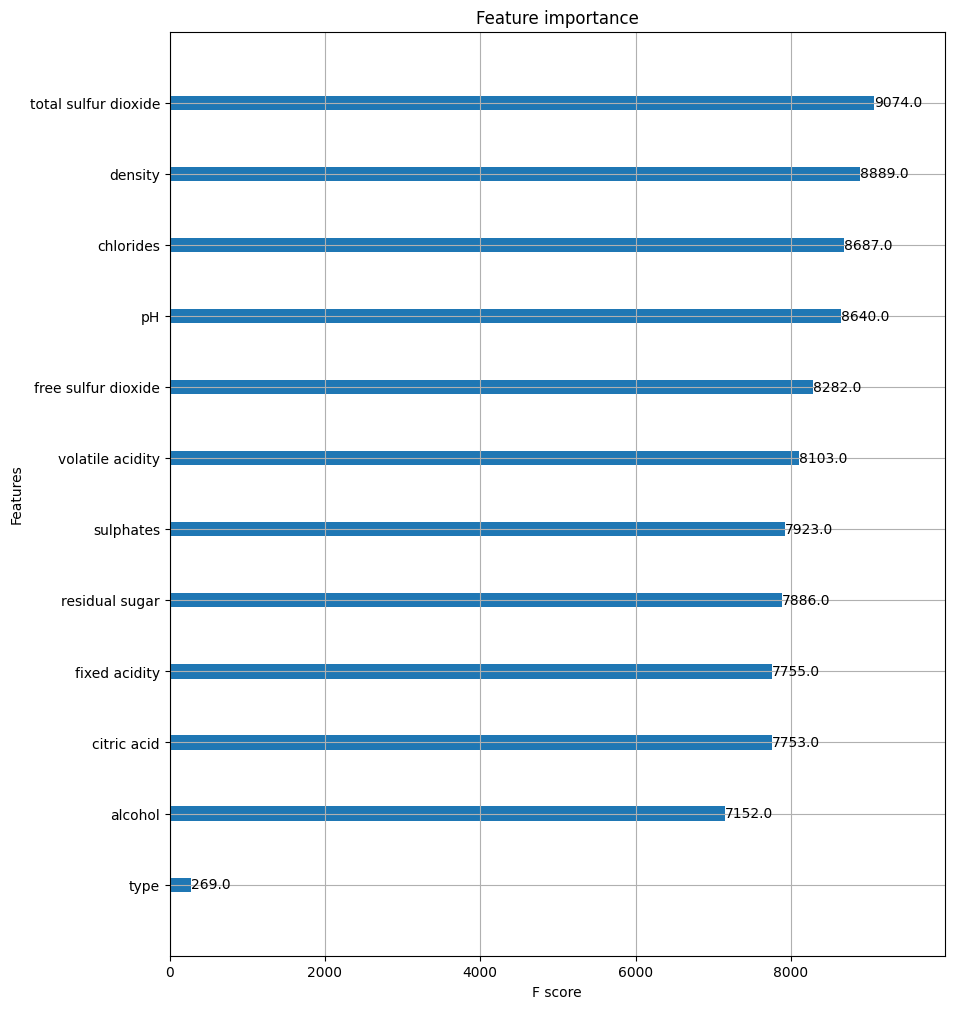

In [ ]:
#추가적으로 feature importance 결과 출
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb,ax)